## Importing dataset for Autism Detection

In [1]:
pip install vpython

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('autchild.txt')
display(data.head(n=5))

FileNotFoundError: [Errno 2] No such file or directory: 'autchild.txt'

In [4]:
# Total number of records
n_records = len(data.index)

# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class'] == 'YES'])

# Number of records where individual's with no ASD
n_asd_no = len(data[data['Class'] == 'NO'])

# Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 292
Individuals diagonised with ASD: 141
Individuals not diagonised with ASD: 151
Percentage of individuals diagonised with ASD: 48.29%


##  Featureset Exploration 

### This data contains 704 instances, and contains the following attributes:

#### age: number (Age in years).
#### gendar: String [Male/Female].
#### ethnicity: String (List of common ethnicities in text format).
#### Born with jaundice: Boolean [yes or no].
#### Family member with PDD: Boolean [yes or no].
#### Who is completing the test: String [Parent, self, caregiver, medical staff, clinician ,etc.].
#### Country of residence : String (List of countries in text format).
#### Used the screening app before : Boolean [yes or no] (Whether the user has used a screening app)
#### Screening Method Type: Integer [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult).
#### Question 1-10 Answer: Binary [0, 1] (The answer code of the question based on the screening method used).
#### Screening Score: Integer (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).

## Data preparation

In [5]:
asd_data = pd.read_csv('autchild.csv', na_values=['?'])
asd_data.head(n=5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [6]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


### Step 01 - Clean the dataset

In [7]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
5,0,0,1,0,1,1,0,1,0,1,...,m,NaN,no,yes,Egypt,no,5,'4-11 years',NaN,NO
9,0,0,1,1,1,0,1,1,0,0,...,f,NaN,no,yes,Austria,no,5,'4-11 years',NaN,NO
11,0,1,0,0,1,0,0,0,0,1,...,f,NaN,no,no,Kuwait,no,3,'4-11 years',NaN,NO
19,1,1,1,1,1,1,0,1,0,1,...,m,NaN,no,no,Egypt,no,8,'4-11 years',NaN,YES
21,0,0,1,1,0,1,0,1,1,0,...,f,NaN,no,no,Egypt,no,5,'4-11 years',NaN,NO
24,1,0,1,1,1,1,0,1,1,1,...,m,NaN,no,no,Egypt,no,8,'4-11 years',NaN,YES
28,0,1,1,0,0,0,1,1,0,1,...,m,NaN,no,yes,'United Arab Emirates',no,5,'4-11 years',NaN,NO
32,1,0,0,1,0,1,1,1,1,1,...,m,NaN,no,no,Egypt,no,7,'4-11 years',NaN,YES


### Since the data is randomly distributed, we will proceed by dropping the rows with missing data.

In [8]:
asd_data.dropna(inplace=True)
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.685484,0.516129,0.745968,0.572581,0.754032,0.713710,0.625000,0.479839,0.540323,0.733871,6.427419,6.366935
std,0.465262,0.500750,0.436196,0.495704,0.431530,0.452941,0.485102,0.500604,0.499379,0.442826,2.386444,2.342711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,7.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


### If for numerical values, we have NaN values in fair quantity, we can replace them with their medians  but since the data type in which NaN is found is mostly categorical, we will have to find a different solution to it.

In [9]:
#asd_data.median()
#numerical = ['age', 'result']
#asd_data.fillna(asd_data[numerical].median())
#asd_data.describe()

### Verifying the data-types for all the attributes, counting number of records and checkig target-class distribution

In [10]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class'] == 'YES'])

# Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class'] == 'NO'])

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result               int64
age_desc            object
relation            object
Class               object
dtype: object
Total number of records: 248
Individuals diagonised with ASD: 126
Individuals not diagonised with ASD: 122


### Step 02 - Quick visualisations via Seaborn

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

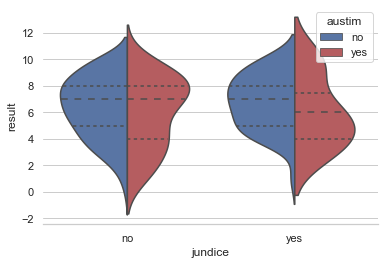

In [12]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

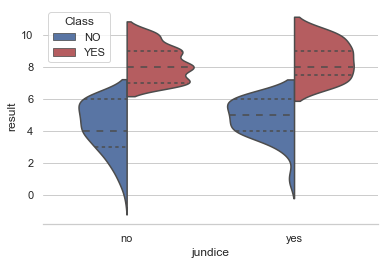

In [13]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

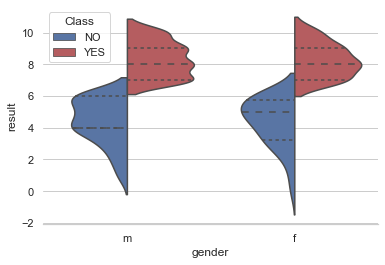

In [14]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


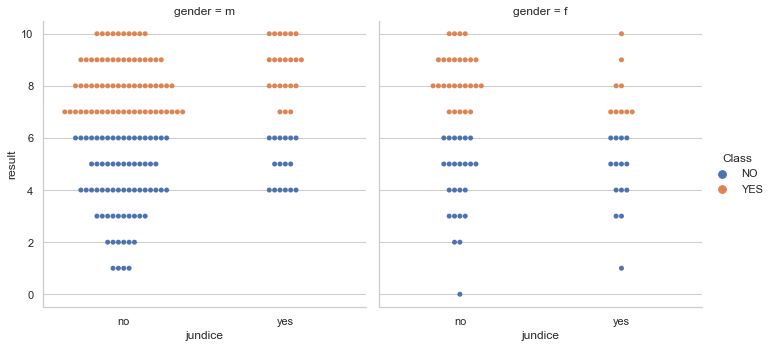

In [15]:
sns.factorplot(x="jundice", y="result", hue="Class", col="gender", data=asd_data, kind="swarm");

c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


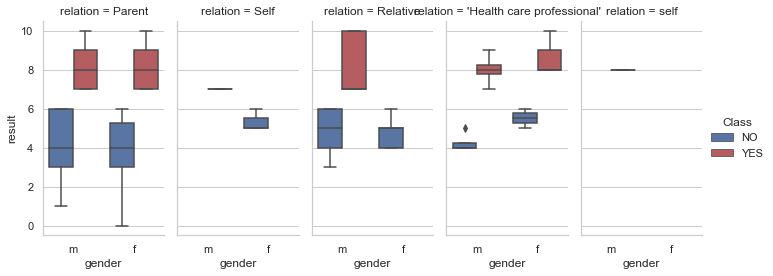

In [16]:
sns.factorplot(x="gender", y="result", hue="Class",
               col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


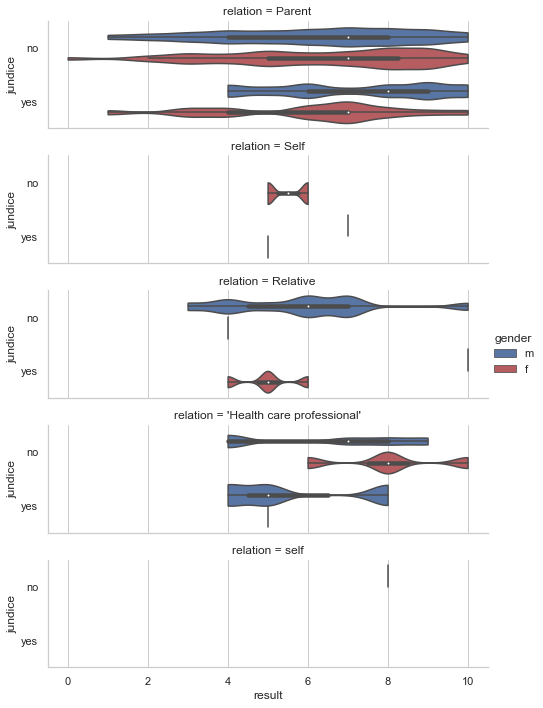

In [17]:
g = sns.factorplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", size=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

###  We have used 'swamp' kind of graph to express the relationship between several different features present in the data whereas the 'box' method was used to present the visual way of showing how different features were associated with each other.

In [18]:
# Split the data into features and target label
asd_raw = asd_data['Class']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

### Some of the models we use for this definition require input data to be nirmalised so that they don't produce inaccurate results:

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,'Middle Eastern ',no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
4,0.142857,m,Others,yes,no,'United States',1.0,Parent,1,1,1,1,1,1,1,1,1,1
6,0.142857,m,White-European,no,no,'United Kingdom',0.7,Parent,1,0,1,1,1,1,0,1,0,1
7,0.142857,f,'Middle Eastern ',no,no,Bahrain,0.8,Parent,1,1,1,1,1,1,1,1,0,0


### Mostly for all the learning algorithms, it is equired that we input the numerical data instead of non-numerical ones. But as we can only see above, a large part of the data we have gathered is non-numerical in nature, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. 

### One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. Additionally, as with the non-numeric features, I need to convert the non-numeric target label, 'Class/ASD' to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("YES" and "NO" to Class/ASD), I can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively. In code cell below, I will implement the following:

### Use pandas.get_dummies() to perform one-hot encoding on the 'features_minmax_transform' data.
### Convert the target label 'asd_raw' to numerical entries.
### Set records with "NO" to 0 and records with "YES" to 1.

In [20]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Philippines,contry_of_res_Romania,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Turkey,relation_'Health care professional',relation_Parent,relation_Relative,relation_Self,relation_self
0,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.142857,1.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
6,0.142857,0.7,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0.142857,0.8,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


79 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'", "contry_of_res_'Isle of Man'", "contry_of_res_'New Zealand'", "contry_of_res_'Saudi Arabia'", "contry_of_res_'South Africa'", "contry_of_res_'South Korea'", "contry_of_res_'U.S. Outlying Islands'", "contry_of_res_'United Arab Emirates'", "contry_of_res_'United Kingdom'", "contry_of_res_'United States'", 'contry_of_res_Afghanistan', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahrain', 'contry_of_res_Ba

Text(0, 0.5, 'Frequency')

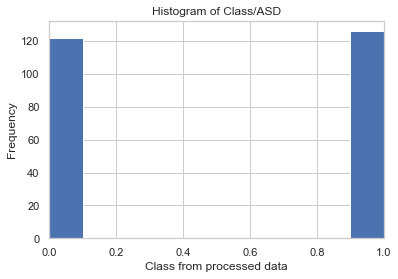

In [21]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class from processed data')
plt.ylabel('Frequency')

### Shuffle and test data

In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

X_train = X_train.values.reshape(X_train.shape[0], -1)
X_test = X_test.values.reshape(X_test.shape[0], -1)


Training set has 198 samples.
Testing set has 50 samples.


### Step 03 - Models

### Decision Tree Model (Supervised Learning)

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [25]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


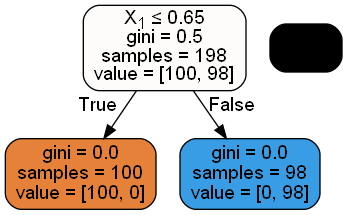

In [26]:
import pydotplus 


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png()) 

In [27]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [28]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1]
False: [1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1]


In [29]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[22  0]
 [ 0 28]]


## Evaluation Metrics (by Confusion Matrix)

### Classification Accuracy: Overall, how often is the classifier correct?

In [30]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


### Classification Error: Overall, how often is the classifier incorrect?

In [31]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.0


### Sensitivity: When the actual value is positive, how often is the prediction correct?

In [32]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


### Specificity: When the actual value is negative, how often is the prediction correct?

In [33]:
specificity = TN / (TN + FP)

print(specificity)

1.0


### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [34]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


### Precision: When a positive value is predicted, how often is the prediction correct?

In [35]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))

1.0


## Visualising the classification prediction:

In [36]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [37]:
# print the first 10 predicted probabilities of class membership
dectree.predict_proba(X_test)[0:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [38]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

In [39]:
# allow plots to appear in the notebook

import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

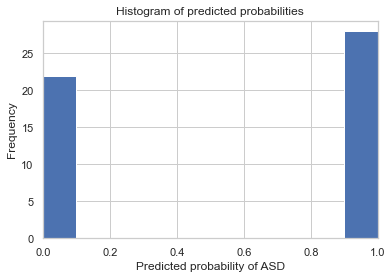

In [40]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

## Receiver Operating Characteristic Curve (ROC)

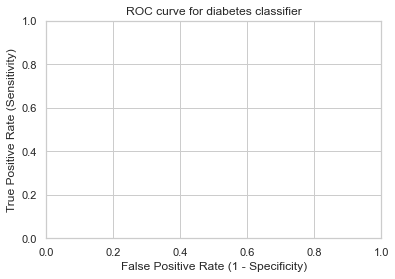

In [41]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [42]:
# Score metric for the model performance
dectree.score(X_test, y_test)

1.0

In [43]:
# Cross-Validation: Instead of single train/test split, we do k-fold testing for better accuracy

from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [44]:
# AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC

from sklearn.model_selection import cross_val_score
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9836666666666668

In [46]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9964209401709402

In [47]:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

### K-Nearest Neighbours

In [48]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.875

In [49]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9618856837606838

In [50]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9459459459459459

In [51]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean())

10 0.875
11 0.867
12 0.8831666666666667
13 0.8668333333333333
14 0.891
15 0.8826666666666666
16 0.9068333333333334
17 0.8664999999999999
18 0.8746666666666666
19 0.8706666666666667
20 0.8828333333333334
21 0.8625
22 0.8788333333333334
23 0.8746666666666666
24 0.9031666666666667
25 0.8828333333333334
26 0.8911666666666667
27 0.8748333333333334
28 0.899
29 0.875
30 0.891
31 0.8708333333333333
32 0.875
33 0.859
34 0.867
35 0.8631666666666667
36 0.8793333333333333
37 0.8713333333333335
38 0.8713333333333335
39 0.8633333333333333
40 0.8753333333333334
41 0.859
42 0.8671666666666666
43 0.8551666666666666
44 0.8711666666666666
45 0.8591666666666666
46 0.8671666666666666
47 0.8671666666666666
48 0.8751666666666666
49 0.8591666666666666


### Support Vector Machine

In [52]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [53]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9879999999999999

In [54]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9993589743589745

In [55]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9722222222222222

### Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.7986666666666667

In [57]:
# AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.8808226495726496

In [58]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8552631578947367

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9878333333333333

In [60]:
# AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9993589743589745

In [61]:
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

### Linear Discrimant Analysis

### Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning. It is a technique used to find a linear combination of features that best separates the classes in a dataset. works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of between-class variance to within-class variance. In short, it finds the directions in the feature space that best separate the different classes of data.

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9356666666666665

In [63]:
#AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(lda, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9762820512820513

In [64]:
lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9722222222222222

### Quadratic Discriminant Analysis

### Quadratic discriminant analysis is quite similar to Linear discriminant analysis except we relaxed the assumption that the mean and covariance of all the classes were equal. Therefore, we required to calculate it separately. 

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, features_final, asd_classes, cv=10)
cv_scores.mean()

c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\pytho

0.5896666666666667

In [66]:
#AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(qda, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\anubh\appdata\local\programs\python\pytho

0.7227029914529915

In [67]:
qda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.6666666666666666

## Model Tuning

In [68]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


# Initialize the classifier
clf = SVC(random_state = 1)

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9600
F-score on testing data: 0.9643

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


### In this GridSearchCV methos, we came up with the best result when the kernel was selected as linear.

## Feature Importance

In [69]:
pip install jupyterlab-visualpython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
pip install visualpython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
pip install visualpy


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier
#import visuals as vs

# Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)

# Plot
#vs.feature_plot(importances, X_train, y_train)

[ 1.34102027e-16  1.00000000e+00  0.00000000e+00  0.00000000e+00
  2.38890425e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.18756865e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.38139644e-18  0.00000000e+00  1.40621962e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.94075156e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [73]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier
#import visuals as vs

# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
#print(importances)

# Plot
#vs.feature_plot(importances, X_train, y_train)

## Feature Selection

### how does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features(in order with their weightage factor) contribute more than half of the importance of all features present in the data. These 5 features are: 'result', 'relation_self', 'country_of_residence', 'jundice_no', 'jundice_yes'.

### This hints that we can attempt to reduce the feature space and simplify the information required for the model to learn. Although looking at those weight factor it seems like 'result' feature is clearly dominating its influence on the algorithms over all other features.

## Building the Neural Network Model

In [74]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [81]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 79))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 640       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [83]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [84]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
13/13 - 5s - loss: 0.6940 - accuracy: 0.5202 - val_loss: 0.6918 - val_accuracy: 0.5800 - 5s/epoch - 418ms/step
Epoch 2/100
13/13 - 0s - loss: 0.6903 - accuracy: 0.5657 - val_loss: 0.6877 - val_accuracy: 0.6400 - 191ms/epoch - 15ms/step
Epoch 3/100
13/13 - 0s - loss: 0.6858 - accuracy: 0.6111 - val_loss: 0.6824 - val_accuracy: 0.6600 - 159ms/epoch - 12ms/step
Epoch 4/100
13/13 - 0s - loss: 0.6807 - accuracy: 0.6263 - val_loss: 0.6778 - val_accuracy: 0.6600 - 129ms/epoch - 10ms/step
Epoch 5/100
13/13 - 0s - loss: 0.6794 - accuracy: 0.6061 - val_loss: 0.6733 - val_accuracy: 0.7000 - 164ms/epoch - 13ms/step
Epoch 6/100
13/13 - 0s - loss: 0.6745 - accuracy: 0.6465 - val_loss: 0.6674 - val_accuracy: 0.7400 - 146ms/epoch - 11ms/step
Epoch 7/100
13/13 - 0s - loss: 0.6733 - accuracy: 0.5960 - val_loss: 0.6620 - val_accuracy: 0.7400 - 158ms/epoch - 12ms/step
Epoch 8/100
13/13 - 0s - loss: 0.6642 - accuracy: 0.6616 - val_loss: 0.6558 - val_accuracy: 0.7200 - 150ms/epoch - 12ms/step
Ep

## Evaluating the Model

In [85]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score[1])

7/7 [==============================] - 0s 5ms/step - loss: 0.1224 - accuracy: 0.9899

 Training Accuracy: 0.9898989796638489

 Testing accuracy:  0.9599999785423279
